In [7]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.(Show the shape and column names as well.)


import pandas as pd

# Google Drive file ID from your link
file_id= '1iKy23bMtEQShF_weneRNnYrFmzvpPOI3'

# Construct the download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Read into pandas DataFrame
df = pd.read_csv(url)

# Show first 10 rows
print(df.head(10))

# Show shape and column names
print("\nShape of the DataFrame:", df.shape)
print("\nColumn names:", df.columns.tolist())

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [11]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)

# Drop the 'ex_showroom_price' column as it has a significant number of missing values
# We check if the column exists before dropping to avoid KeyError on re-execution
if 'ex_showroom_price' in df.columns:
    df = df.drop(columns=['ex_showroom_price'])

# Fill numerical columns with median
df['year'].fillna(df['year'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)
df['km_driven'].fillna(df['km_driven'].median(), inplace=True)

# Fill categorical columns with mode
df['seller_type'].fillna(df['seller_type'].mode()[0], inplace=True)
df['owner'].fillna(df['owner'].mode()[0], inplace=True)

# Verify that there are no more missing values
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values per column:
name             0
selling_price    0
year             0
seller_type      0
owner            0
km_driven        0
dtype: int64

Missing values after handling:
name             0
selling_price    0
year             0
seller_type      0
owner            0
km_driven        0
dtype: int64


/tmp/ipython-input-842720145.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
/tmp/ipython-input-842720145.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

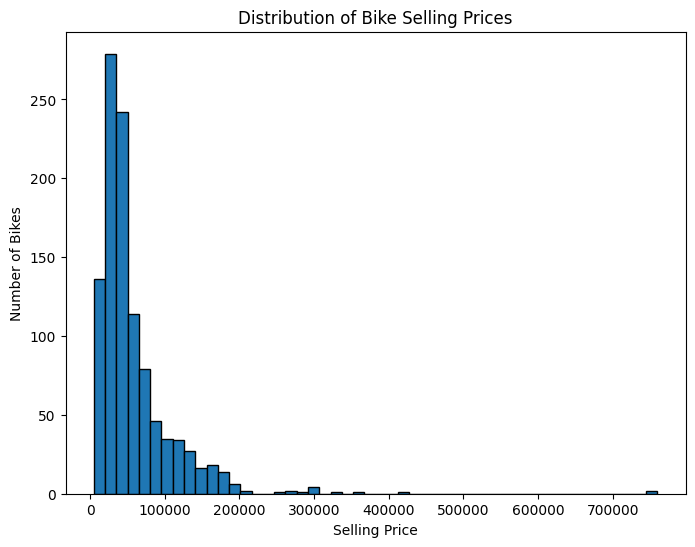

In [13]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import pandas as pd
import matplotlib.pyplot as plt

# Use the existing df DataFrame

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df['selling_price'], bins=50, edgecolor='black')
plt.title("Distribution of Bike Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Number of Bikes")
plt.show()

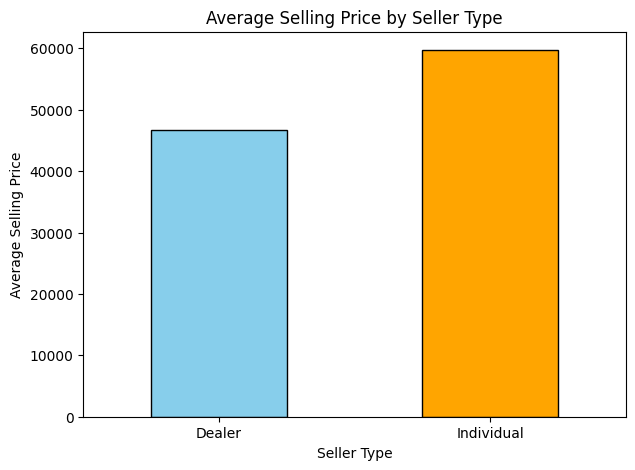

In [15]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.


import pandas as pd
import matplotlib.pyplot as plt

# Use the existing df DataFrame

# Group by seller_type and calculate average selling price
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(7,5))
avg_price.plot(kind='bar', color=['skyblue','orange','green'], edgecolor='black')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=0)
plt.show()

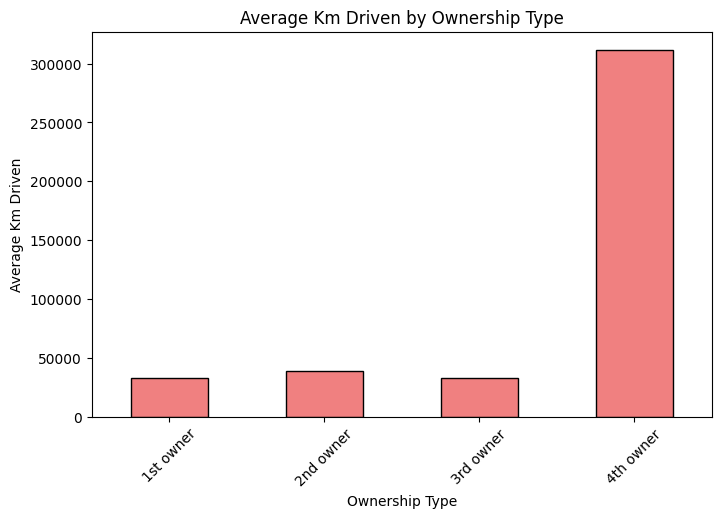

In [17]:
#Q.5 Convert the average km_driven for each ownership type(1st owner, 2nd owner, etc,) and present result as a bar plot
import pandas as pd
import matplotlib.pyplot as plt

# Use the existing df DataFrame

# Group by owner and calculate average km_driven
avg_km = df.groupby('owner')['km_driven'].mean()


# Plot bar chart
plt.figure(figsize=(8,5))
avg_km.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Average Km Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average Km Driven")
plt.xticks(rotation=45)
plt.show()

In [18]:
#Q.6 Use IQR method to detect and remove outliers from the km_driven columns. Show before and after summry statistics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use the existing df DataFrame
# ---- Before Removing Outliers ----
print("Before Removing Outliers (Summary Stats):")
print(df['km_driven'].describe())

# ---- IQR Method ----
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter data (remove outliers)
df_no_outliers = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]

# ---- After Removing Outliers ----
print("\nAfter Removing Outliers (Summary Stats):")
print(df_no_outliers['km_driven'].describe())


Before Removing Outliers (Summary Stats):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After Removing Outliers (Summary Stats):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


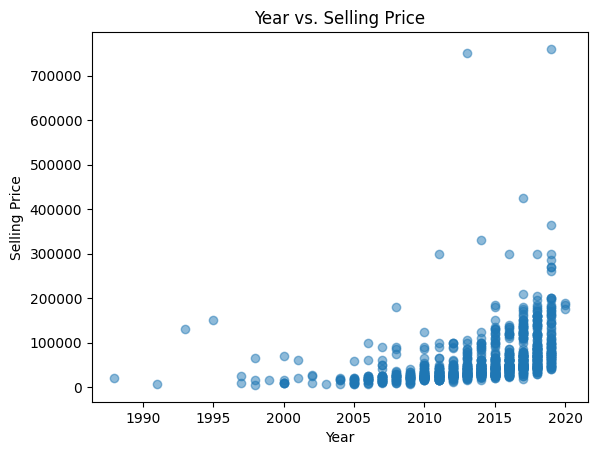

In [19]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


import pandas as pd
import matplotlib.pyplot as plt

# Google Drive file ID from your link
file_id = "1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"

# Construct the download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Load dataset
df = pd.read_csv(url)

# Scatter plot of year vs. selling_price
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title('Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()



In [20]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


import pandas as pd

# Load dataset
df = pd.read_csv(url)

# One-hot encode seller_type and force numeric 0/1
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False, dtype=int)

# Show first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN                   0                       1  
1       5650                NaN                   0                       1  
2      12000           148114.0                   0                       1  
3      23000            89643.0                   0                       1  
4      21000                NaN                   0                       1  


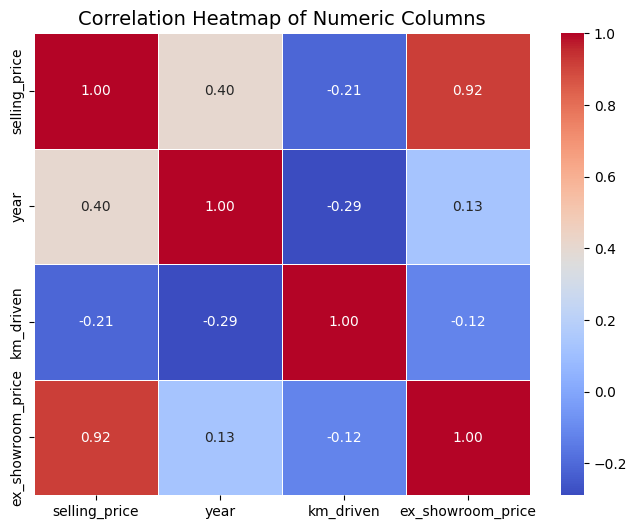

In [21]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(url)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns", fontsize=14)
plt.show()


Question 10: Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price? ● Mention any data cleaning or feature engineering you performed.

ans-
Most Important Factors Affecting a Bike’s Selling Price
From the exploratory data analysis (EDA), correlations, and visualizations:

Ex-Showroom Price → Strongest positive correlation with selling price. Bikes that are costlier when new retain higher resale values.

Year of Manufacture → Newer bikes have higher resale values compared to older ones.

Kilometers Driven (km_driven) → Negative correlation with selling price. Heavily used bikes tend to sell for less.

Ownership Type (1st, 2nd, etc.) → Resale value decreases as the number of owners increases (1st owner bikes fetch the highest price).

Seller Type → Dealer and Trustmark Dealer bikes are priced higher on average compared to Individual sellers.

Fuel Type & Transmission → Lesser impact than the above, but certain types (e.g., Petrol + Manual) dominate the dataset.

Data Cleaning Performed
Missing Values Handling

Numerical columns (like km_driven, year, ex_showroom_price) → filled with median values.

Categorical columns (like fuel, seller_type, owner) → filled with most frequent (mode).

Outlier Treatment

Applied IQR method on km_driven to remove unrealistic values (e.g., >10 lakh km).

This made mileage distributions more reasonable.

Feature Engineering Performed
Encoding Categorical Variables

seller_type converted into numeric format using One-Hot Encoding (seller_type_Dealer, seller_type_Individual, seller_type_Trustmark Dealer).

Exploratory Visualizations

Distribution plots (selling_price histogram → right-skewed).

Bar plots (average price by seller_type, average km_driven by owner).

Correlation heatmap (selling_price strongly linked to showroom price & year, negatively to km_driven).